In [164]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from keras import *
import time
import random

#### Load Mnist Dataset from tf.keras

In [24]:
Dataset = tf.keras.datasets.mnist
(x_train,y_train), (x_test,y_test) = Dataset.load_data()

#### shape of the data

In [25]:
print(f'Training data shape{x_train.shape}')
print(f'Test data shape{x_test.shape}')

Training data shape(60000, 28, 28)
Test data shape(10000, 28, 28)


#### Data visulaization

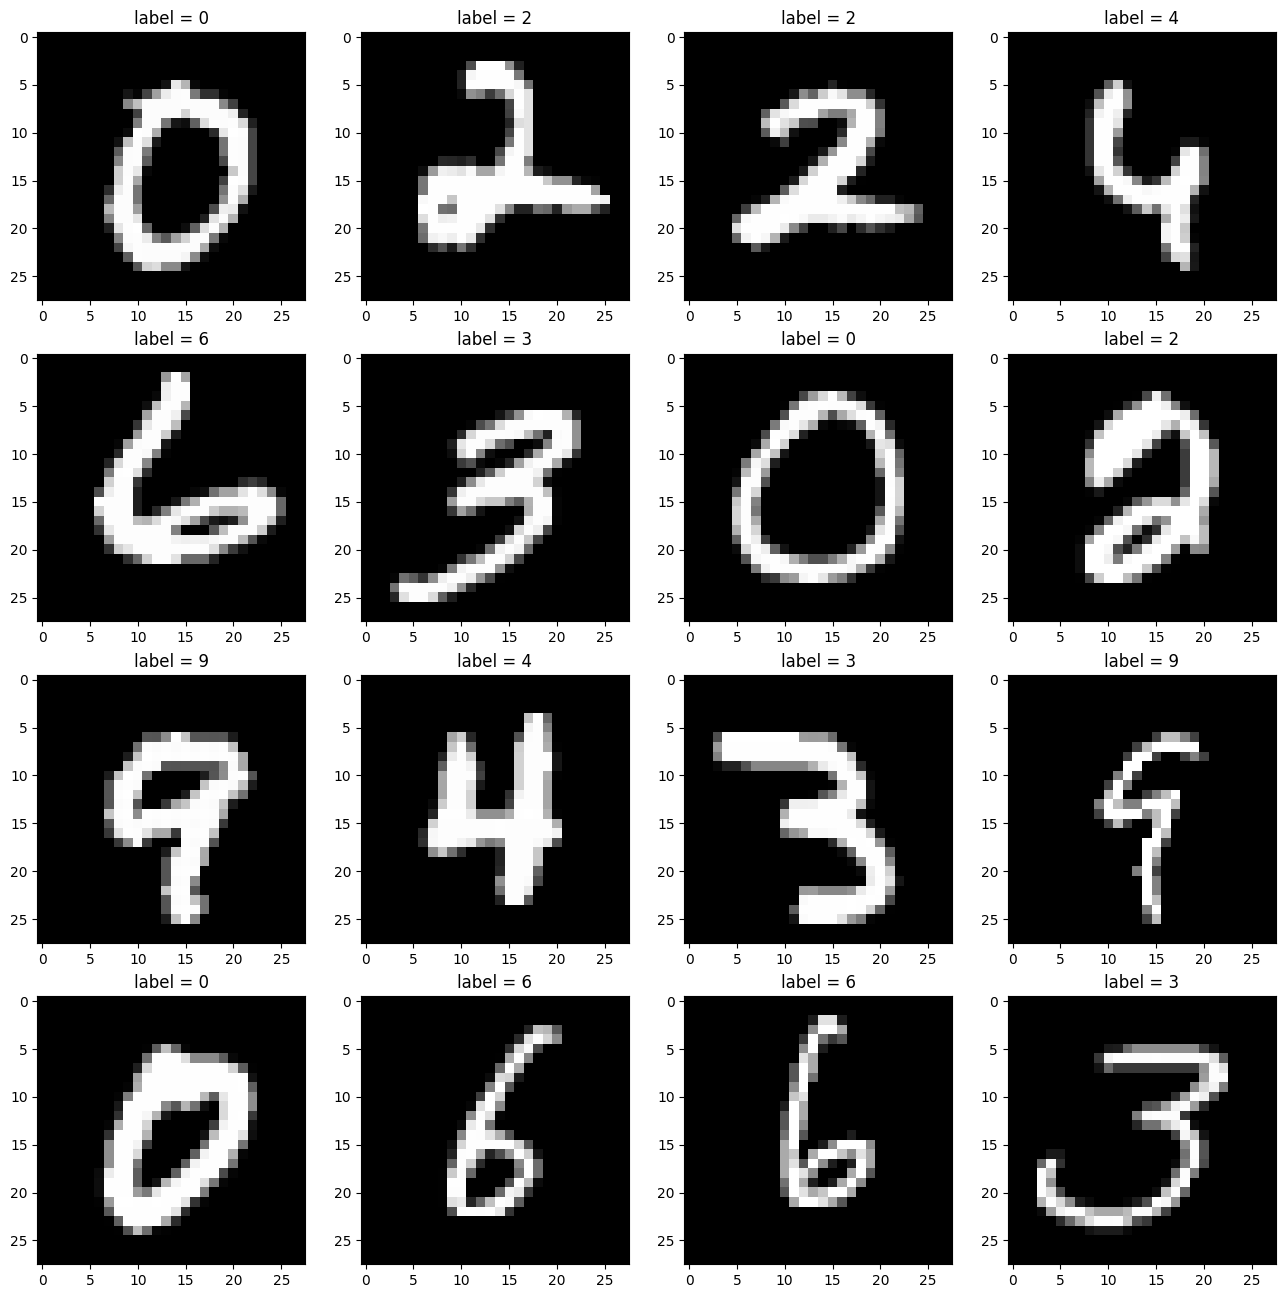

In [165]:
_,axs = plt.subplots(4,4, figsize= (16,16))

for ax in axs.flatten():
    index = random.randrange(0,60000)
    ax.imshow(x_train[index], cmap='gray')
    ax.set_title(f'label = {y_train[index]}')

### ML models

#### prepare training and test data for the ml models

In [27]:
x_train_reshaped = x_train.reshape(60000,784)
x_test_reshaped = x_test.reshape(10000,784)

In [28]:
print(f'min value {x_train_reshaped.min()}')
print(f'max value {x_train_reshaped.max()}')

min value 0
max value 255


### Data scaling

In [29]:
x_train_reshaped = x_train_reshaped/255
x_test_reshaped = x_test_reshaped/255

#### Logistic regression

In [31]:
lregression_model = LogisticRegression(max_iter = 1000)
lregression_model

LogisticRegression(max_iter=1000)

#### Model Training

In [32]:
start_time = time.time()
lregression_model.fit(x_train_reshaped, y_train)
end_time = time.time()

In [33]:
print(f'Excuation time for logistic Regression: {(end_time-start_time)/60:.1f} minutes')

Excuation time for logistic Regression: 2.5 minutes


##### Classification Report for Training

In [35]:
print(classification_report(y_train,lregression_model.predict(x_train_reshaped)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      5923
           1       0.96      0.98      0.97      6742
           2       0.94      0.92      0.93      5958
           3       0.92      0.91      0.92      6131
           4       0.94      0.95      0.94      5842
           5       0.91      0.91      0.91      5421
           6       0.96      0.97      0.96      5918
           7       0.95      0.95      0.95      6265
           8       0.91      0.90      0.91      5851
           9       0.92      0.92      0.92      5949

    accuracy                           0.94     60000
   macro avg       0.94      0.94      0.94     60000
weighted avg       0.94      0.94      0.94     60000



##### Classification Report for Test

In [36]:
print(classification_report(y_test,lregression_model.predict(x_test_reshaped)))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.92      0.91      1010
           4       0.94      0.94      0.94       982
           5       0.90      0.87      0.88       892
           6       0.94      0.95      0.95       958
           7       0.93      0.92      0.93      1028
           8       0.88      0.88      0.88       974
           9       0.91      0.92      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



#### SVM

In [37]:
svm_model = SVC()
svm_model

SVC()

In [38]:
start_time = time.time()
svm_model.fit(x_train_reshaped, y_train)
end_time = time.time()

In [39]:
print(f'Excuation time for SVM: {(end_time-start_time)/60:.1f} minutes')

Excuation time for SVM: 2.8 minutes


In [17]:
y_predict = svm_model.predict(x_train_reshaped)

##### Classification Report for Training

In [19]:
print(classification_report(y_train,y_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5923
           1       0.99      0.99      0.99      6742
           2       0.99      0.99      0.99      5958
           3       0.99      0.98      0.99      6131
           4       0.99      0.99      0.99      5842
           5       0.99      0.99      0.99      5421
           6       0.99      1.00      1.00      5918
           7       0.99      0.99      0.99      6265
           8       0.99      0.99      0.99      5851
           9       0.98      0.98      0.98      5949

    accuracy                           0.99     60000
   macro avg       0.99      0.99      0.99     60000
weighted avg       0.99      0.99      0.99     60000



##### Classification Report for Test

In [20]:
y_test_predict = svm_model.predict(x_test_reshaped)

In [21]:
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



#### Neural Network

In [140]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(784,)),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [141]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [142]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [143]:
start_time = time.time()
model.fit(x_train_reshaped,
          y_train,
          epochs = 5
         )
end_time = time.time()

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8831 - loss: 0.4023
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9697 - loss: 0.1025
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9792 - loss: 0.0644
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9839 - loss: 0.0542
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9878 - loss: 0.0390


In [144]:
print(f'Excuation time for DL: {(end_time-start_time)/60:.1f} minutes')

Excuation time for DL: 0.4 minutes


In [145]:
model.evaluate(x_train_reshaped,y_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9902 - loss: 0.0321


[0.03147383779287338, 0.9900166392326355]

In [146]:
model.evaluate(x_test_reshaped,y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9717 - loss: 0.1006


[0.08310158550739288, 0.975600004196167]

In [156]:
y_train_predict_dl = model.predict(x_train_reshaped)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 870us/step


In [157]:
y_train_predict_dl = [np.argmax(predict) for predict in y_train_predict_dl]

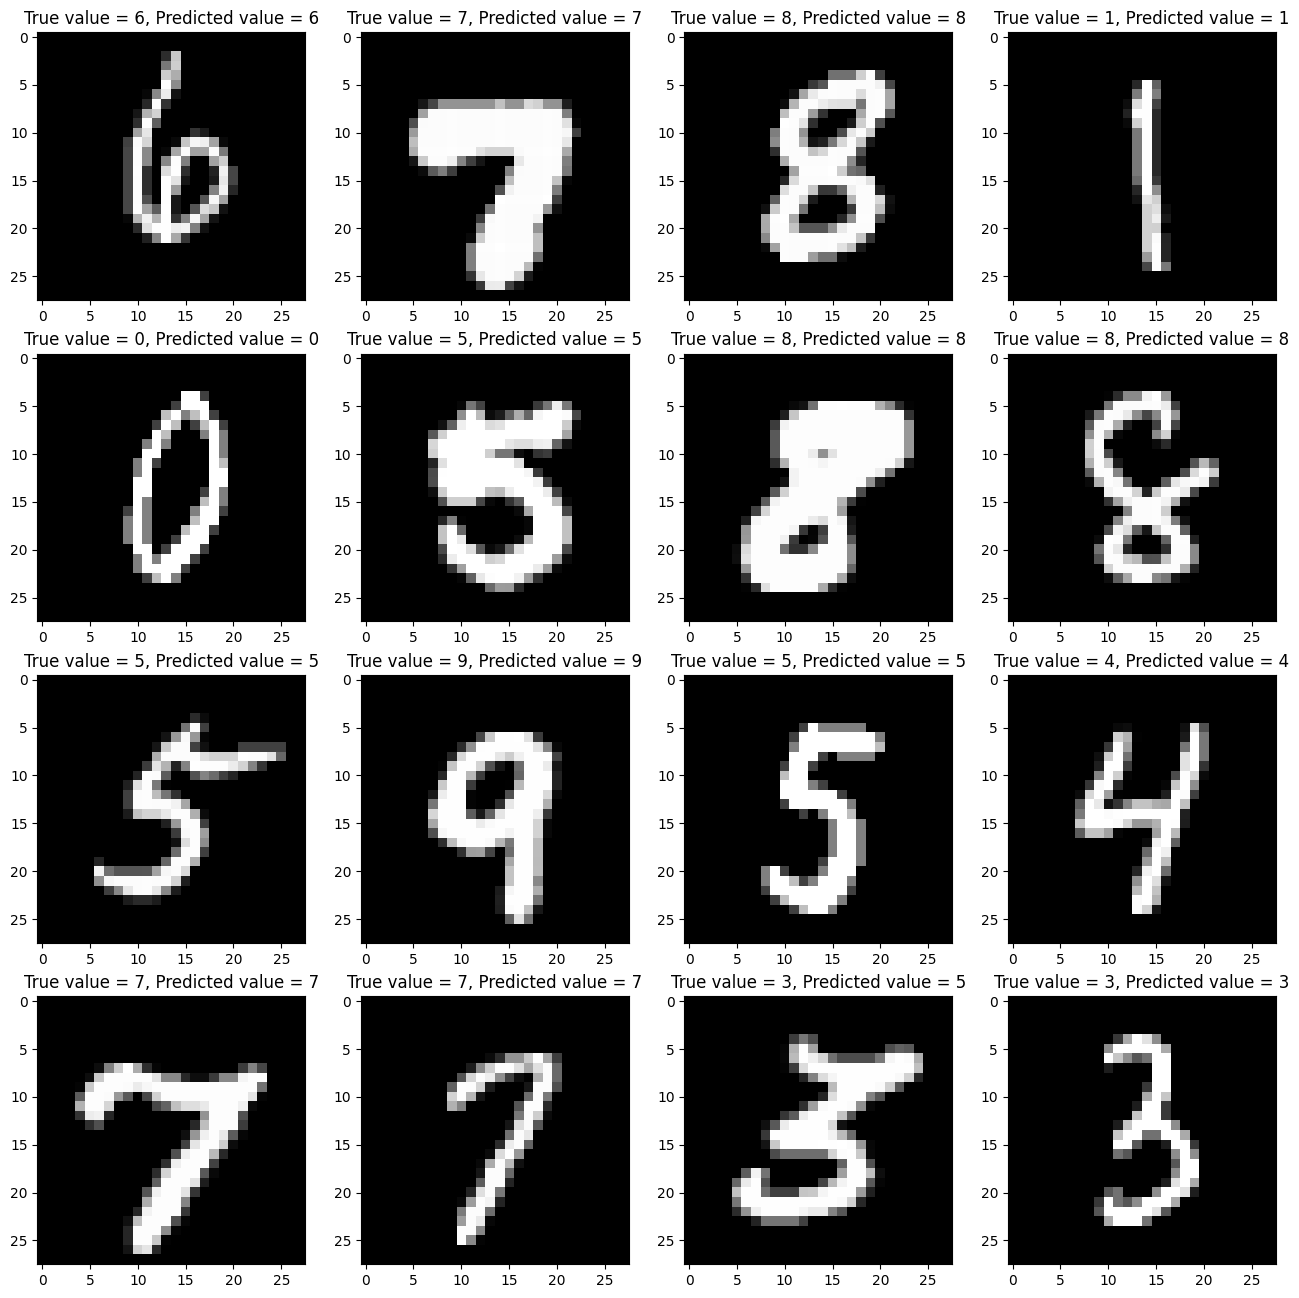

In [166]:
_,axs = plt.subplots(4,4, figsize= (16,16))

for ax in axs.flatten():
    index = random.randrange(0,60000)
    ax.imshow(x_train[index], cmap='gray')
    ax.set_title(f'True value = {y_train[index]}, Predicted value = {y_train_predict_dl[index]}')